## Grid Searching Decision Trees


### Objective

The objective of this notebook is to perform and compare different hyperparameter search techniques for a DecisionTreeClassifier, including GridSearchCV and its alternatives provided by scikit-learn. These alternatives aim to optimize the search process, saving computational resources and time compared to the exhaustive brute force approach. The notebook will evaluate and discuss the performance and time efficiency of each method, with a focus on the relative speed of the searches, acknowledging that actual times may vary depending on individual computing power.

### Comparing Grid Searches

This notebook will explore four grid search options for tuning the parameters of a DecisionTreeClassifier using the same set of parameters. Each grid search tool has a .cv_results_ attribute that includes timing information. By examining this attribute, we will compare the time taken by each search method and discuss which is the most efficient for identifying the best hyperparameters. The search methods to be compared are:

- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`
 

### Time Comparison

#### GridSearchCV: 
Typically the most time-consuming because it exhaustively searches over all parameter combinations.

#### RandomizedSearchCV: 
Faster than GridSearchCV because it only evaluates a subset of parameter combinations.

#### HalvingGridSearchCV: 
More efficient than GridSearchCV by iteratively pruning less promising configurations.

#### HalvingRandomSearchCV: 
Combines the efficiency of halving search with the randomness of RandomizedSearchCV, often faster than the standard randomized search.

### Best Score Comparison

#### Best Score: 
Indicates the highest cross-validation score achieved by each search method. While GridSearchCV might explore all possible combinations, RandomizedSearchCV and Halving methods might achieve similar or even better scores with less computational effort.

### Analysis Outline

To explore and compare the four grid search options for DecisionTreeClassifier (i.e., GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, and HalvingRandomSearchCV), we will perform the following steps:

#### Import required libraries

#### Setup the dataset: 
Ensure the dataset is loaded and preprocessed.

#### Define parameter grid: 
Specify the hyperparameters to search over.

#### Perform grid searches: 
Use each grid search method to find the best hyperparameters.

#### Compare the results: 
Compare the time taken and the scores of the best estimators.

#### Visualize the results: 
Plot the comparison.

### Step 1: Import Libraties and Set Up Parameters

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.experimental import enable_halving_search_cv
from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [27]:
dtree = DecisionTreeClassifier()

### Step 2: Load the Dataset

In [28]:
#load the dataset
data = pd.read_csv(r'C:\Users\agnek\OneDrive\Documents\Educational_Training Materials\Berkeley Haas\Codio\Module14\Whickham.txt')

In [29]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


### Step 3: Ecode and Split the Data

In [30]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'outcome' and 'smoker' columns separately
data['outcome'] = label_encoder.fit_transform(data['outcome'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])


In [31]:
# Prepare the data
X = data.drop(columns=['outcome'])  # Features
y = data['outcome']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 4: Define Parameter Grid

In [32]:
# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Code Review

#### Definition of param_grid:
param_grid is a dictionary that defines a grid of hyperparameters for a DecisionTreeClassifier. This grid will be used to perform hyperparameter tuning, typically with grid search methods such as GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, or HalvingRandomSearchCV.

#### Hyperparameter: max_depth:
'max_depth': Specifies the maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### [1, 2, 4, 6, 8, 10, None]: 
A list of values that max_depth will take during the search. It includes specific depths (1, 2, 4, 6, 8, 10) and None which means the tree can grow until it cannot split any further.

#### Hyperparameter: min_samples_split:
'min_samples_split': Specifies the minimum number of samples required to split an internal node.

#### [2, 5, 10]: 
A list of values that min_samples_split will take during the search. It includes values 2, 5, and 10. Higher values prevent the model from learning overly specific patterns (overfitting).

#### Hyperparameter: min_samples_leaf:
'min_samples_leaf': Specifies the minimum number of samples that a leaf node must have.
[1, 2, 4]: A list of values that min_samples_leaf will take during the search. It includes values 1, 2, and 4. Setting this parameter can prevent overfitting by ensuring leaf nodes have a minimum number of samples.

#### Hyperparameter: criterion:
'criterion': Specifies the function to measure the quality of a split.

#### ['gini', 'entropy']: 
A list of criteria that will be used to evaluate the splits. gini refers to the Gini impurity, and entropy refers to the information gain (entropy). These are the two criteria provided by DecisionTreeClassifier to choose the best split at each node.

### Purpose
The purpose of defining param_grid is to provide a range of values for the hyperparameters of the DecisionTreeClassifier that will be explored during the grid search. By evaluating the model with different combinations of these hyperparameters, the goal is to find the combination that yields the best performance on the validation set.

### Step 5: Perform Grid Searches

In [34]:
# List to store results
results = []

# GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
results.append(('GridSearchCV', grid_search.cv_results_, elapsed_time))

# RandomizedSearchCV
start_time = time.time()
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
results.append(('RandomizedSearchCV', random_search.cv_results_, elapsed_time))

# HalvingGridSearchCV
start_time = time.time()
halving_grid_search = HalvingGridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, factor=3, random_state=42)
halving_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
results.append(('HalvingGridSearchCV', halving_grid_search.cv_results_, elapsed_time))

# HalvingRandomSearchCV
start_time = time.time()
halving_random_search = HalvingRandomSearchCV(DecisionTreeClassifier(), param_distributions=param_grid, factor=3, random_state=42)
halving_random_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
results.append(('HalvingRandomSearchCV', halving_random_search.cv_results_, elapsed_time))

### Step 6:Compare the Results

In [35]:
# Collect the best scores and times
search_methods = ['GridSearchCV', 'RandomizedSearchCV', 'HalvingGridSearchCV', 'HalvingRandomSearchCV']
best_scores = []
times = []

for method, result, elapsed_time in results:
    best_index = np.argmax(result['mean_test_score'])
    best_score = result['mean_test_score'][best_index]
    best_scores.append(best_score)
    times.append(elapsed_time)

# Create a DataFrame for the results
df_results = pd.DataFrame({
    'Search Method': search_methods,
    'Best Score': best_scores,
    'Time (seconds)': times
})

print(df_results)

           Search Method  Best Score  Time (seconds)
0           GridSearchCV    0.841144        1.625905
1     RandomizedSearchCV    0.841144        0.610745
2    HalvingGridSearchCV    0.871429        2.645748
3  HalvingRandomSearchCV    0.882540        0.981531


### Step 7: Visualize the Results

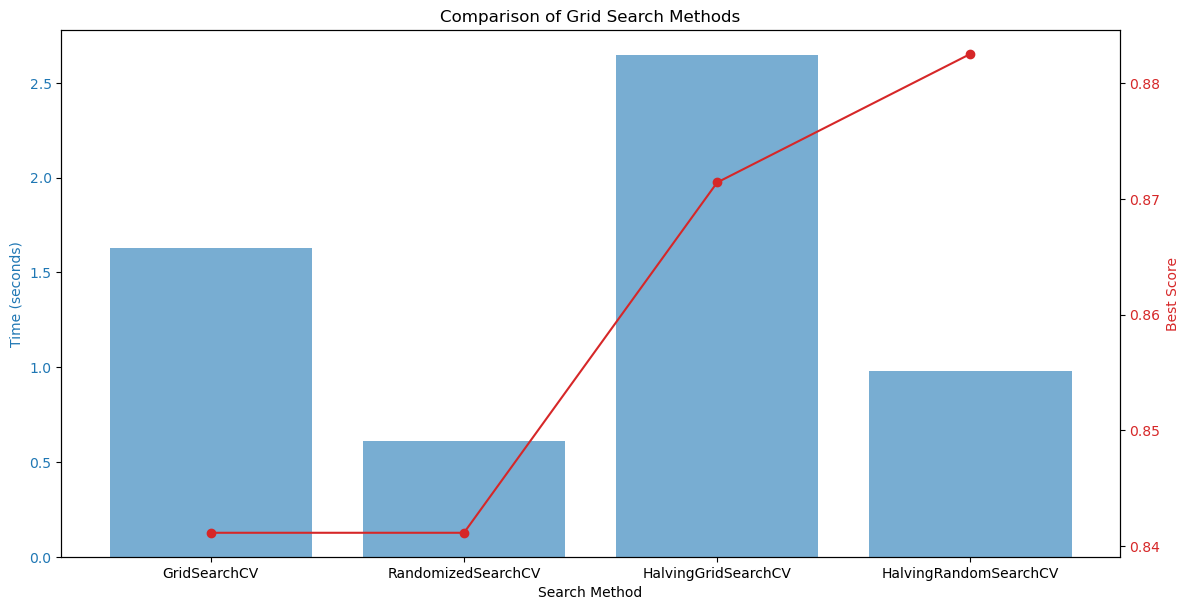

In [37]:
# Plot the comparison
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Search Method')
ax1.set_ylabel('Time (seconds)', color=color)
ax1.bar(df_results['Search Method'], df_results['Time (seconds)'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Best Score', color=color)  
ax2.plot(df_results['Search Method'], df_results['Best Score'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of Grid Search Methods')
plt.show()


### Analysis

#### GridSearchCV:

Best Score: 0.841144
Time (seconds): 1.625905
Interpretation: GridSearchCV achieved a good score but took a moderate amount of time. It exhaustively searched over all parameter combinations, which is thorough but time-consuming.

#### RandomizedSearchCV:

Best Score: 0.841144
Time (seconds): 0.610745
Interpretation: RandomizedSearchCV achieved the same score as GridSearchCV but in significantly less time. This indicates that a random subset of parameter combinations was sufficient to find a good model, making it more efficient than GridSearchCV.

#### HalvingGridSearchCV:

Best Score: 0.871429
Time (seconds): 2.645748
Interpretation: HalvingGridSearchCV achieved a higher score than both GridSearchCV and RandomizedSearchCV, but it took the most time. This method prunes less promising parameter combinations iteratively, resulting in a more accurate model but at the cost of increased computation time.

#### HalvingRandomSearchCV:

Best Score: 0.882540
Time (seconds): 0.981531
Interpretation: HalvingRandomSearchCV achieved the highest score among all methods and in less time than HalvingGridSearchCV. This approach combines the efficiency of randomized search with iterative pruning, providing the best balance between model performance and search time.

### Conclusion

#### Best Performing Method: 
HalvingRandomSearchCV achieved the highest best score (0.882540) in a reasonable amount of time (0.981531 seconds). It strikes the best balance between performance and efficiency, making it the most effective method for this dataset and parameter grid.

#### Efficiency: 
RandomizedSearchCV is the most time-efficient method, achieving a decent score (same as GridSearchCV) in the least amount of time (0.610745 seconds).

#### Comprehensive Search: 
While GridSearchCV ensures a thorough search, it is less efficient compared to the other methods. HalvingGridSearchCV, although more time-consuming, yields a better score by focusing on promising parameter combinations.

### Recommendations

#### For Quick Searches: 
Use RandomizedSearchCV for a fast and efficient search if computational resources are limited or a quick result is needed.
For Best Performance: Use HalvingRandomSearchCV to achieve the highest model performance with a balanced approach to search time.

#### For Thorough Searches: 
Consider GridSearchCV or HalvingGridSearchCV when exhaustive search or a slightly more thorough exploration of parameter combinations is necessary.






